<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

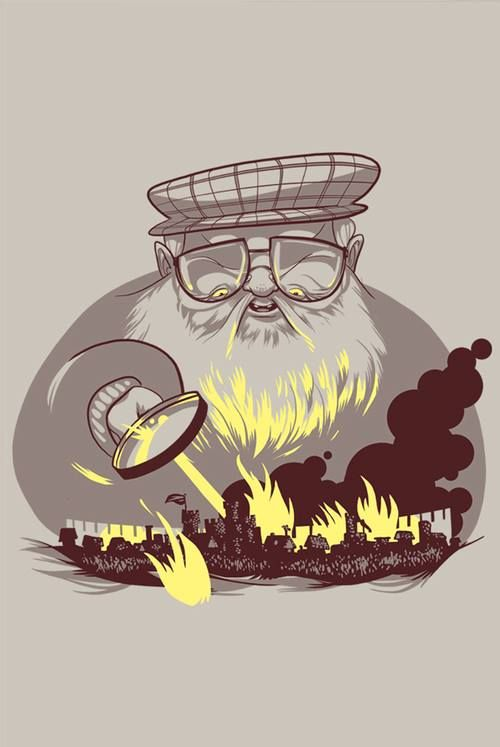

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [45]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 64.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 74.9MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [47]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [48]:
data_nan = data.isna().sum(axis=0).to_frame(name='Количество NaN')
data_nan

,Количество NaN
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [49]:
percentage_nan = []
for ind, _ in enumerate(list(data.columns)):
  percentage_nan.append(round(data[data.columns[ind]].isna().sum(axis=0)/len(data[data.columns[ind]]) * 100, 3))

data_nan['Процент NaN'] = percentage_nan
data_nan

,Количество NaN,Процент NaN
name,0,0.000
title,840,53.950
male,0,0.000
culture,1069,68.658
dateOfBirth,1278,82.081
mother,1539,98.844
father,1535,98.587
heir,1536,98.651
house,381,24.470
spouse,1357,87.155


Text(0.5, 1.0, 'Процент пропущенных значений в каждом столбце')

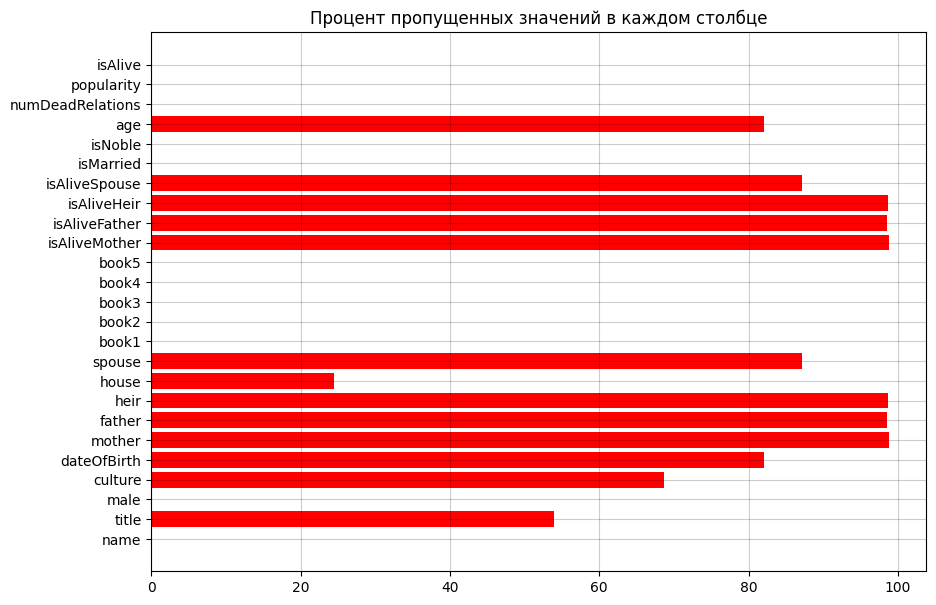

In [50]:
plt.figure(figsize=(10, 7))
plt.grid(color='black', alpha=0.2)
plt.barh(data_nan.index, data_nan['Процент NaN'], color='red')
plt.title('Процент пропущенных значений в каждом столбце')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [52]:
#для того, чтобы принимать решение по поводу значений NaN, посмотрим корреляцию количественных признаков по отношению к целевой переменной
#для этого нужно удалить качественные признаки. очевидно, что имя персонажа, его родителей, наследника и супруги(а) не влияют на целевую переменную.
#поэтому их можно удалить. остальные целевые признаки пока поместим в отдельный датасет

data.drop(['name', 'spouse', 'heir', 'father', 'mother'], axis=1, inplace=True)

qual_features = pd.DataFrame()
for col in list(data.columns):
  if col in ['title', 'house', 'culture']:
    qual_features[col] = data[col]
    data.drop(col, axis=1, inplace=True)

qual_features

,title,culture,house
S.No,,,
1,NaN,NaN,NaN
2,Lord of the Crossing,Rivermen,House Frey
3,Ser,NaN,House Swyft
4,Queen,NaN,House Arryn
5,Greenstone,Dornish,House Santagar
...,...,...,...
1553,Archmaester,NaN,NaN
1554,NaN,NaN,NaN
1555,NaN,NaN,House Seaworth


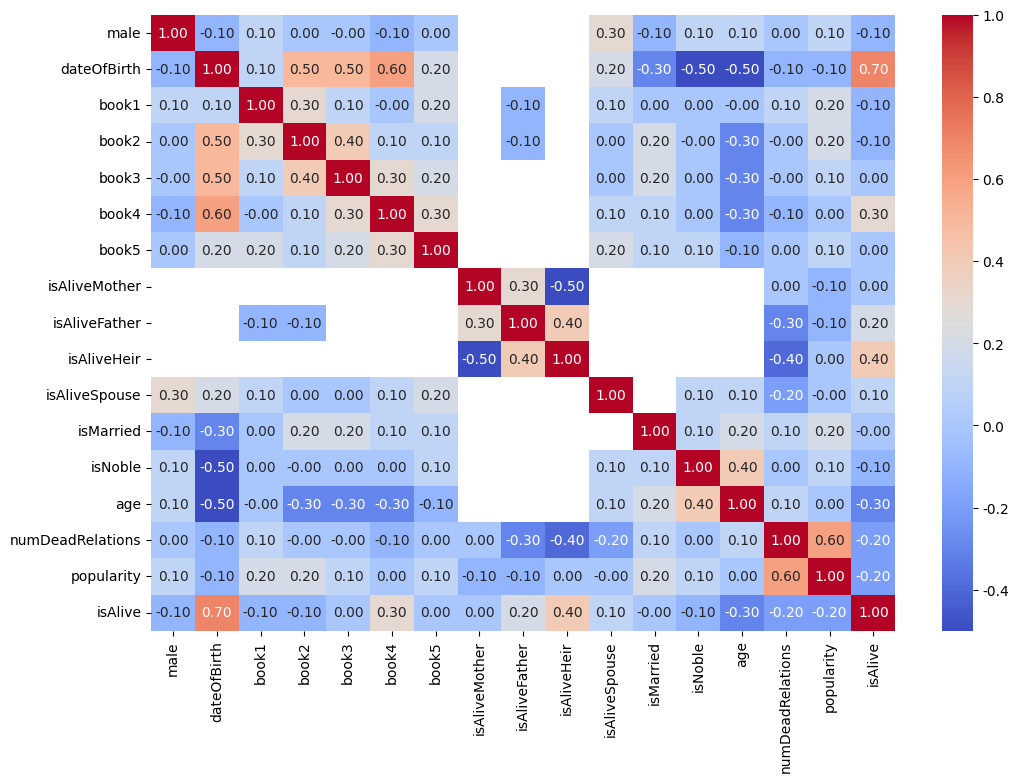

In [53]:
#посмотрим корреляцию количественных признаков
data_corr = data.corr().round(1)
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'format': '%.1f'})
plt.show()

In [54]:
#попробуем вставить средние значения вместо значений NaN
data.fillna(data.mean(), inplace=True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [55]:
isPopular = isPopular = list(map(lambda x: 0.5 if x == 0.5 else (0 if x < 0.5 else 1), data['popularity']))
data['isPopular'] = isPopular

boolDeadRelations = [1 if x > 0 else 0 for x in data['numDeadRelations']]
data['boolDeadRelations'] = boolDeadRelations

data.drop(['numDeadRelations', 'popularity'], axis=1, inplace=True)
data

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,1,247.551971,0,0,0,0,0,1.000000,0.000000,0.000000,0.79,0,0,35.290323,0,1,1
2,1,208.000000,1,1,1,1,1,0.666667,0.227273,0.666667,1.00,1,1,97.000000,1,1,1
3,1,247.551971,0,0,0,1,0,0.666667,0.227273,0.666667,0.79,0,1,35.290323,1,0,0
4,0,82.000000,0,0,0,0,0,0.666667,0.227273,0.666667,0.00,1,1,23.000000,0,0,0
5,0,276.000000,0,0,0,1,0,0.666667,0.227273,0.666667,1.00,1,1,29.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,247.551971,1,0,1,1,0,0.666667,0.227273,0.666667,0.79,0,1,35.290323,1,0,0
1554,0,247.551971,1,1,0,0,0,0.666667,0.227273,0.666667,0.79,0,0,35.290323,0,0,0
1555,1,247.551971,0,1,1,1,1,0.666667,0.227273,0.666667,0.79,0,0,35.290323,0,0,0


In [56]:
data = pd.concat([data, qual_features], axis = 1)

In [57]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

reverse_cult = {value: key for key, values in cult.items() for value in values}

def simplify_culture(culture):

  if pd.isna(culture):
        return culture

  culture_lower = culture.lower()
  return reverse_cult.get(culture_lower, culture)

data['culture'] = data['culture'].apply(simplify_culture)
data

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,title,culture,house
S.No,,,,,,,,,,,,,,,,,,,,
1,1,247.551971,0,0,0,0,0,1.000000,0.000000,0.000000,0.79,0,0,35.290323,0,1,1,NaN,NaN,NaN
2,1,208.000000,1,1,1,1,1,0.666667,0.227273,0.666667,1.00,1,1,97.000000,1,1,1,Lord of the Crossing,Rivermen,House Frey
3,1,247.551971,0,0,0,1,0,0.666667,0.227273,0.666667,0.79,0,1,35.290323,1,0,0,Ser,NaN,House Swyft
4,0,82.000000,0,0,0,0,0,0.666667,0.227273,0.666667,0.00,1,1,23.000000,0,0,0,Queen,NaN,House Arryn
5,0,276.000000,0,0,0,1,0,0.666667,0.227273,0.666667,1.00,1,1,29.000000,1,0,0,Greenstone,Dornish,House Santagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,247.551971,1,0,1,1,0,0.666667,0.227273,0.666667,0.79,0,1,35.290323,1,0,0,Archmaester,NaN,NaN
1554,0,247.551971,1,1,0,0,0,0.666667,0.227273,0.666667,0.79,0,0,35.290323,0,0,0,NaN,NaN,NaN
1555,1,247.551971,0,1,1,1,1,0.666667,0.227273,0.666667,0.79,0,0,35.290323,0,0,0,NaN,NaN,House Seaworth


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [58]:
#удалим колонки с количественными признаками, которые имеют корреляцию с целевой переменной 0
data.drop(columns=['book3', 'book5', 'isMarried', 'isAliveMother'], axis=1, inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [59]:
#целевая переменная количественная
balance_data = data['isAlive'].value_counts(normalize=True) * 100
balance_data

,proportion
isAlive,
1,77.842004
0,22.157996


In [ ]:
#виден очевидный дисбаланс

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [60]:
#переводим качественные признаки title, house, culture в количественные
culture = len(data['culture'].unique())
title = len(data['title'].unique())
house = len(data['house'].unique())
print(culture)
print(title)
print(house)

for col in ['culture', 'title', 'house']:
  freq = data[col].value_counts(normalize=True)
  data[f'{col}_encoded'] = data[col].map(freq)

data.drop(['culture', 'title', 'house'], axis=1, inplace=True)
data.head(10)

35
196
316


,male,dateOfBirth,book1,book2,book4,isAliveFather,isAliveHeir,isAliveSpouse,isNoble,age,isAlive,isPopular,boolDeadRelations,culture_encoded,title_encoded,house_encoded
S.No,,,,,,,,,,,,,,,,
1,1,247.551971,0,0,0,0.000000,0.000000,0.79,0,35.290323,0,1,1,NaN,NaN,NaN
2,1,208.000000,1,1,1,0.227273,0.666667,1.00,1,97.000000,1,1,1,0.020492,0.001395,0.075680
3,1,247.551971,0,0,1,0.227273,0.666667,0.79,1,35.290323,1,0,0,NaN,0.426778,0.005952
4,0,82.000000,0,0,0,0.227273,0.666667,0.00,1,23.000000,0,0,0,NaN,0.004184,0.009354
5,0,276.000000,0,0,1,0.227273,0.666667,1.00,1,29.000000,1,0,0,0.043033,0.001395,0.001701
6,1,247.551971,0,0,0,1.000000,1.000000,0.79,0,35.290323,1,1,1,NaN,NaN,NaN
7,1,183.000000,0,0,0,0.227273,0.666667,1.00,1,26.000000,0,0,0,0.057377,0.002789,0.034014
8,1,247.551971,0,0,0,1.000000,1.000000,0.79,0,35.290323,0,1,1,NaN,NaN,NaN
9,1,247.551971,0,0,0,0.227273,0.666667,0.79,1,35.290323,0,0,0,NaN,0.426778,NaN


In [61]:
data['culture_encoded'] = data['culture_encoded'].fillna(data['culture_encoded'].mean())
data['title_encoded'] = data['title_encoded'].fillna(data['title_encoded'].mean())
data['house_encoded'] = data['house_encoded'].fillna(data['house_encoded'].mean())

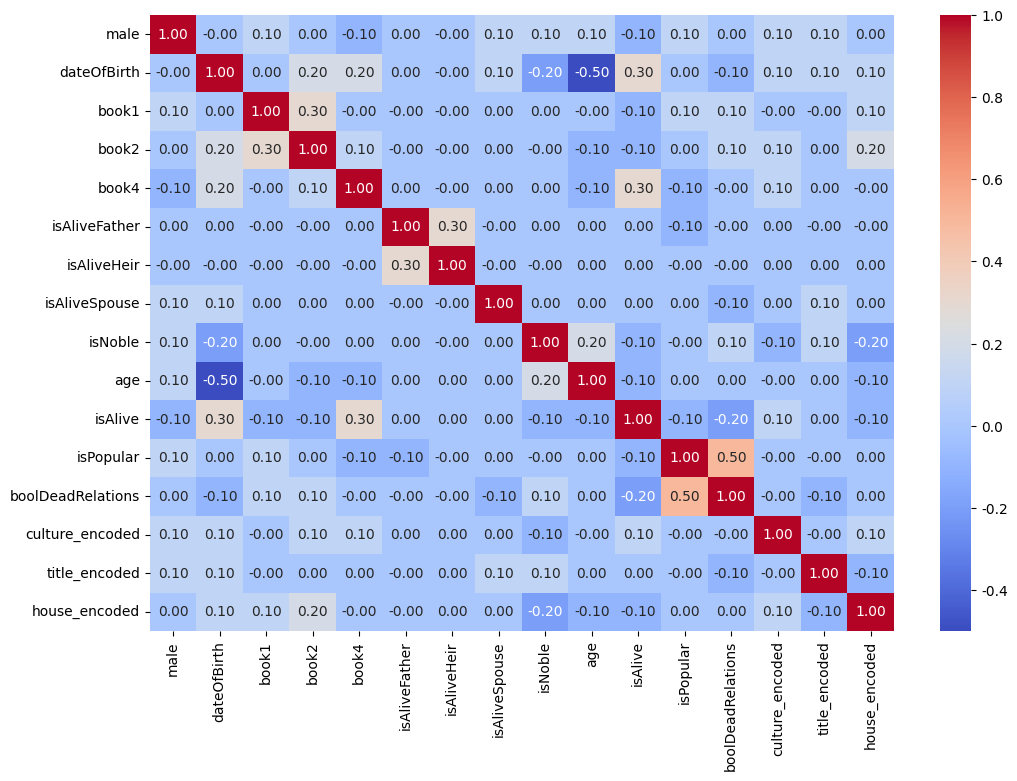

In [62]:
#посмотрим еще раз на корреляцию
data_corr = data.corr().round(1)
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'format': '%.1f'})
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [63]:
X = data.drop('isAlive', axis=1).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2498, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [72]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(max_iter=5000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [73]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [74]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8123


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [75]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.41MB/s]


In [76]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [78]:
submission['isAlive'] = y_pred

In [79]:
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,0
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [80]:
submission.to_csv("/content/new_submission.csv", index=False)